##Reading and exploring dataset

 Use JSON File hera and access the Amazon reviews from cell phones and Accessories Data.

In [1]:
import gensim
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading the dataset

In [3]:
df = pd.read_json("/content/drive/MyDrive/Cell_Phones_and_Accessories_5.json", lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [4]:
df.shape

(194439, 9)

In [5]:
new_df = df.drop(df.index[2000:194439])
new_df.shape

(2000, 9)

Now we will reviewTxt Coloumn.

In [6]:
new_df.reviewText[3]

"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."

# Performing Preprocessing and Tokenizing

Preprocessing such as converting words to lower case, trimming spaces, removing punctuations etc.

In [7]:
review_text = new_df.reviewText.apply(gensim.utils.simple_preprocess)
review_text

0       [they, look, good, and, stick, good, just, don...
1       [these, stickers, work, like, the, review, say...
2       [these, are, awesome, and, make, my, phone, lo...
3       [item, arrived, in, great, time, and, was, in,...
4       [awesome, stays, on, and, looks, great, can, b...
                              ...                        
1995    [this, is, one, of, the, best, headsets, ive, ...
1996    [this, is, without, doubt, the, bluetooth, hea...
1997    [this, bluetooth, headset, is, tiny, compared,...
1998    [good, product, hr, talk, time, it, does, give...
1999    [have, special, standard, for, bluetooth, devi...
Name: reviewText, Length: 2000, dtype: object

# Training Word2Vec model

We are using window size of 10.A sentence with at least 2 words should only be considered (min_count). Workers define how many CPU threads to be used.

In [8]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)

Building Vocabulary

In [9]:
model.build_vocab(review_text, progress_per=1000)

How to train Word2Vec Model

In [10]:
# Total examples
model.corpus_count

2000

In [11]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(804764, 1117965)

# Finding Similar Words and Similarity between words

In [12]:
model.wv.most_similar("day")

[('hours', 0.9975656270980835),
 ('hour', 0.9963018298149109),
 ('started', 0.9950475096702576),
 ('new', 0.9940645694732666),
 ('never', 0.9935656785964966),
 ('replace', 0.9934070706367493),
 ('later', 0.9921862483024597),
 ('overnight', 0.9914945960044861),
 ('decided', 0.9914531707763672),
 ('dropped', 0.9914143681526184)]

In [13]:
model.wv.similarity(w1="bike", w2="car")

0.96418035

In [18]:
model.wv.similarity(w1="sun", w2="star")

0.9473741

Getting 35561 words and their vectors

In [19]:
word_vectors = model.wv.vectors
words = model.wv.index_to_key #35561 words

In [20]:
len(word_vectors)

5252

In [21]:
# Reduce dimensionality with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Adjust the number of components as needed
word_vectors_pca = pca.fit_transform(word_vectors)

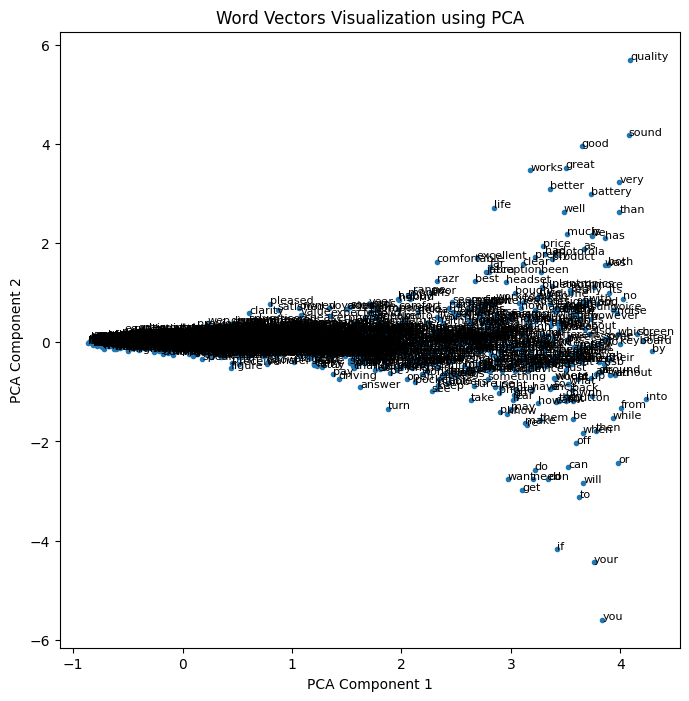

In [22]:
import matplotlib.pyplot as plt

# Visualize word vectors in 2D
plt.figure(figsize=(8, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='.')
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=8)
plt.title('Word Vectors Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## **Task** **2**

In [23]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Load pre-trained GloVe vectors (replace with your file path)
glove_input_file = '/content/drive/MyDrive/glove.6B.50d.txt'
word2vec_output_file = '/content/drive/MyDrive/glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
model1 = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Analogy task
result = model1.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

<ipython-input-23-4ba0326dbdb1>:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


[('queen', 0.8523604273796082)]


 **TASK** **3**

In [24]:
# Semantic relationship example
similarity_w2v = model.wv.similarity('sun', 'earth')
similarity_glove = model1.similarity('sun', 'earth')
print("Similarity between 'sun' and 'earth' (Word2Vec):", similarity_w2v)
print("Similarity between 'sun' and 'earth' (GloVe):", similarity_glove)
print("Similarity between 'sun' and 'star' (Word2Vec):", similarity_glove)
print("Similarity between 'sun' and 'star' (GloVe):", similarity_glove)

# Syntactic relationship example
analogy_task_result_w2v = model.wv.most_similar(positive=['star', 'sun'], negative=['earth'], topn=1)
analogy_task_result_glove = model1.most_similar(positive=['star', 'sun'], negative=['earth'], topn=1)
print("Word2Vec Analogy Task Result:", analogy_task_result_w2v)
print("GloVe Analogy Task Result:", analogy_task_result_glove)

Similarity between 'sun' and 'earth' (Word2Vec): 0.8456986
Similarity between 'sun' and 'earth' (GloVe): 0.603816
Similarity between 'sun' and 'star' (Word2Vec): 0.603816
Similarity between 'sun' and 'star' (GloVe): 0.603816
Word2Vec Analogy Task Result: [('performs', 0.9361748695373535)]
GloVe Analogy Task Result: [('fan', 0.6648756861686707)]


In [25]:
analogy_task_result_w2v = model.wv.most_similar(positive=['star', 'sun'], negative=['earth'], topn=1)
analogy_task_result_glove = model1.most_similar(positive=['star', 'sun'], negative=['earth'], topn=1)
print("Word2Vec Analogy Task Result:", analogy_task_result_w2v)
print("GloVe Analogy Task Result:", analogy_task_result_glove)

Word2Vec Analogy Task Result: [('performs', 0.9361748695373535)]
GloVe Analogy Task Result: [('fan', 0.6648756861686707)]
